# **Clustering**

Clustering is an unsupervised learning technique that involves grouping similar data points together into clusters or subgroups based on their similarity. K-means is a popular clustering algorithm that partitions the data points into K clusters based on their similarity to each other.
In this lab, we will be using the wine dataset from the UCI Machine Learning repository and apply the K-means algorithm to form clusters based on chemical analysis of wines.

***About Dataset***

We will use **wine dataset** from the UCI Machine Learning repository. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The dataset can be downloaded using the link https://archive.ics.uci.edu/ml/datasets/wine or it can be loaded using sklearn.datasets 

**Import necessary libraries**

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

***Load the wine dataset***

In [2]:
data = load_wine()

In [3]:
wine = pd.DataFrame(data.data, columns=data.feature_names)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
wine.shape

(178, 13)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

***Separate features and target***

In [6]:
target = wine['alcohol']
wine_data = wine.drop('alcohol', axis=1)

In [7]:
wine_data.shape

(178, 12)

***Feature Scaling***

Before applying the K-means algorithm, we need to scale the features so that they are on the same scale. We will use the StandardScaler class from Scikit-learn to scale the data.

In [8]:
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_data)


***Apply K-means Algorithm***

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(wine_data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

***Evaluating the Clusters by using scatter plot***

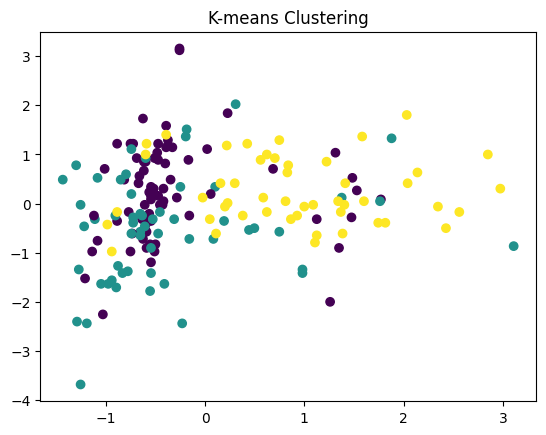

In [10]:
plt.scatter(wine_data_scaled[:, 0], wine_data_scaled[:, 1], c=kmeans.labels_)
plt.title('K-means Clustering')
plt.show()
# It will create a scatter plot of the data points with each cluster represented by a different color.


***Evaluate Model Performance***

To evaluate the performance of K-means clustering, we can use the within-cluster sum of squares (WSS) metric, also known as the inertia. The idea is to compute the sum of squared distances between each point in a cluster and the centroid of the cluster, and then sum up these values across all clusters. The WSS metric provides an indication of how compact the clusters are.

We fit K-means clustering models with different values of k ranging from 1 to 10 using a for loop. For each value of k, we compute the WSS metric using the inertia_ attribute of the KMeans object and store it in a list called wss_values. Finally, we plot the WSS values against different values of k to visualize the "elbow" point, which is the value of k that results in a significant drop in WSS. This point indicates the optimal number of clusters for this dataset.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

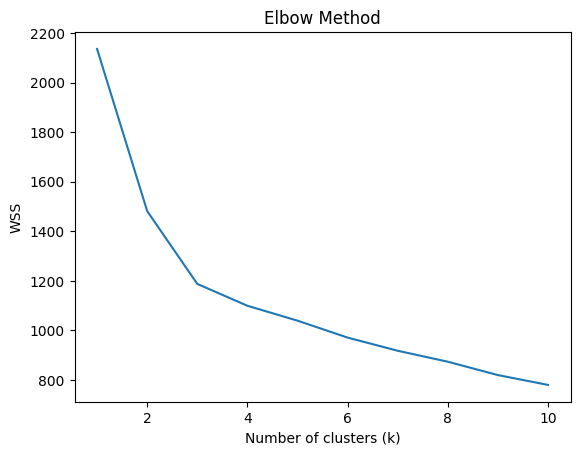

In [11]:
# Fit K-means clustering with different values of k
wss_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(wine_data_scaled)
    wss_values.append(kmeans.inertia_)

# Plot the WSS values against different values of k
plt.plot(range(1, 11), wss_values)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WSS')
plt.show()
